# **Microkinetic modeling**

In [1]:
import mkm
from mkm.model import MKM
from mkm.reaction_network import ReactionNetworkGenerator
import numpy as np
import yaml
import json

* Load config and json (bag_of_energies.json) file

In [2]:
# load config file including elementary reaction steps information
yaml_file = f"{mkm.EXAMPLE}/config.yml"
with open(yaml_file) as f:
    config = yaml.safe_load(f)

# load json file of "bag of energies" which you can generate by mkm.bag_of_energies.BagofEnergiesGen
json_file = f"{mkm.EXAMPLE}/bag_of_energies.json"
with open(json_file) as f:
    bag_of_energies = json.load(f)

* **let's load reaction network using ReactionNetworkGenerator again**

In [3]:
rn = ReactionNetworkGenerator(
    config.get("rxn_eqn", {}), 
    bag_of_energies,
    config["adsorption"],
    )
rxn_network = rn.convert_all()

* ** Now, let's load microkinetic model.** \
  **for the model, we need reaction network and config, we've already loaded, as well as temperature that we are interested in and species which are in config["int_ads_site"]** 

In [4]:
temperature = 573.15

* **Since config["int_ads_site"] does not include free site, let's add ["*"]**

In [5]:
y_list = ["*"]
y_list += list(config["int_ads_site"].keys())
y_list

['*',
 'I000*',
 'I001*',
 'I002*',
 'I003*',
 'I004*',
 'I006*',
 'I008*',
 'I010*',
 'I011*',
 'I012*',
 'I014*',
 'I015*']

In [6]:
mkm = MKM(rxn_network, config, y_list, temperature)
mkm

* **Finally, let's compute the MKM by ODE solver and to get coverages and rates information** \
  **for this you need initial coverages(y0) in order of y_list and a sequence of time points (t) for which to solve for y**

In [7]:
t = np.linspace(0, 20, 50)

y_list = ["*","I000*","I001*","I002*","I003*","I004*","I006*","I008*","I010*", "I011*","I012*","I014*","I015*"]
y0 = np.zeros(len(y_list))
y0[y_list.index("*")] = 1
y0

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
cov, result_rates = mkm.compute(y0, t)

In [9]:
cov[-1, :]

array([3.32785787e-01, 2.52508594e-02, 1.30065807e-02, 1.42823970e-05,
       8.62776045e-04, 5.59732831e-09, 6.43657075e-09, 3.68649907e-13,
       6.27658346e-01, 4.17383904e-04, 3.97297651e-06, 3.18920299e-10,
       2.09300986e-13])

In [10]:
result_rates

{'r1': {'r_for': 134544062.84914076,
  'r_rev': 134544062.9309155,
  'rate': -0.0817747414112091},
 'r2': {'r_for': 2057754.8368971946,
  'r_rev': 2057754.7549820836,
  'rate': 0.08191511104814708},
 'r3': {'r_for': 0.0,
  'r_rev': 0.0398780722850187,
  'rate': -0.0398780722850187},
 'r4': {'r_for': 0.0,
  'r_rev': 0.041825757761056986,
  'rate': -0.041825757761056986},
 'r5': {'r_for': 0.0,
  'r_rev': 9.245506162581739e-05,
  'rate': -9.245506162581739e-05},
 'r6': {'r_for': 0.0,
  'r_rev': 9.707983098148585e-05,
  'rate': -9.707983098148585e-05},
 'r7': {'r_for': 0.0,
  'r_rev': 0.00014057230534229357,
  'rate': -0.00014057230534229357},
 'r8': {'r_for': 1696766.2418059192,
  'r_rev': 1696766.3234325768,
  'rate': -0.08162665762938559},
 'r9': {'r_for': 1033.1871574889205,
  'r_rev': 1033.1469227731036,
  'rate': 0.040234715816950484},
 'r10': {'r_for': 3.6853439384332307,
  'r_rev': 3.6852002452497614,
  'rate': 0.0001436931834692956},
 'r11': {'r_for': 0.846383467556583,
  'r_rev':

* **you can plot the coverages by time**

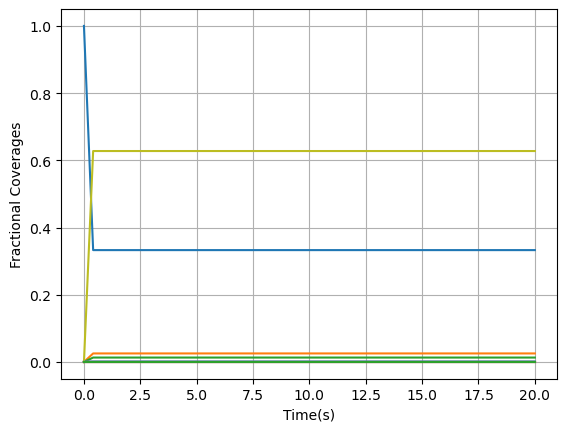

In [11]:
mkm.plot_coverages()

* **If the model worked successfully, the sum of all coverages should be 1**

In [12]:
y = []
for i in range(len(y0)):
    y.append((cov[:, i][-1]))

y_sum = 0
for i in y:
    y_sum += i
print(f"total_balance: {y_sum}")

total_balance: 1.0000000000005576
